<a href="https://colab.research.google.com/github/MK316/Learning01/blob/main/scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn for machine learning

### [1] Understanding iris data



In [1]:
# Statistics visualization: seaborn package

import seaborn as sns
df = sns.load_dataset('iris')
# digit data

In [2]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

In [ ]:
df

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
sns.pairplot(df)

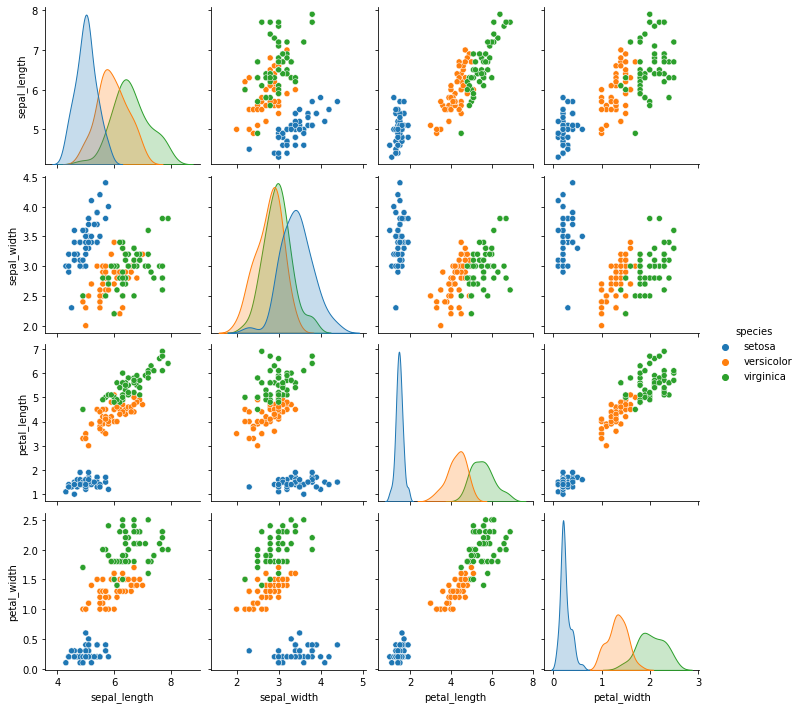

In [ ]:
sns.pairplot(df, hue='species')

Text(0, 0.5, 'sepal_width')

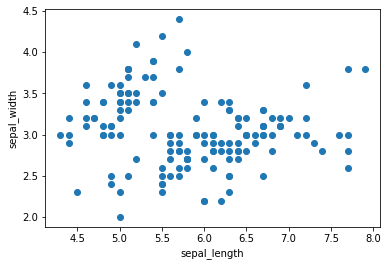

In [5]:
x = list(df['sepal_length'])
y = list(df['sepal_width'])

import matplotlib.pyplot as plt
plt.scatter(x, y);
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

In [6]:
df_setosa = df[df['species']=='setosa']
x = list(df_setosa['sepal_length'])
y = list(df_setosa['sepal_width'])
plt.scatter(x, y);
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('setosa')

Text(0.5, 1.0, 'setosa')

### [2A] Supervised learning: regression (linear regression)
scikit learn (sklearn package)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression(fit_intercept=True)

In [9]:
# x, y are defined above
# change into array format: x = np.array(x)

import numpy as np
x = np.array(x)
y = np.array(y)

print(x.shape); print(y.shape)

(50,)
(50,)


In [ ]:
x

In [10]:
X = x.reshape(50, 1) # 2 dimensions
# X = x.reshape(-1,1) - We know one side, the other you take care... (-1)
X.shape

(50, 1)

In [11]:
model.fit(X, y) # linear regression

LinearRegression()

In [12]:
model.coef_ # 'a' in [y = ax + b]

array([0.7985283])

In [13]:
model.intercept_

-0.569432673039648

In [14]:
xfit = np.linspace(4, 6) # (4, 6, 50)과 동일하다. (4~6까지 동일간격으로 50개 만들어라.)

In [15]:
Xfit = xfit.reshape(-1, 1)
yfit = model.predict(Xfit)

In [16]:
#plt.scatter(x, y)
plt.plot(xfit, yfit);

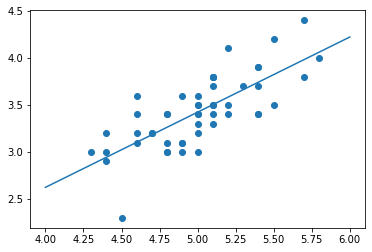

In [20]:
plt.scatter(x,y)
plt.plot(xfit, yfit)

In [21]:
df_setosa.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.742547      0.267176     0.278098
sepal_width       0.742547     1.000000      0.177700     0.232752
petal_length      0.267176     0.177700      1.000000     0.331630
petal_width       0.278098     0.232752      0.331630     1.000000

#### gradio implementation

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

def test (x):
  X = np.array(x).reshape(-1,1)
  y = model.predict(X)
  return y[0]

iface = gr.Interface(test, inputs = ["number"], outputs = ["text"])
iface.launch(debug=True) # Give error message when happens.

### [2B] Supervised learning: classification (Naive Bayes)
Output is a category

In [25]:
x = df.drop('species', axis=1) # axis = 0 (delete row) / 1 (delete column)
x.shape

(150, 4)

In [26]:
y = df['species'] # category data
y.shape

(150,)

image.png

In [31]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y)

In [33]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
yout = model.predict(Xtest)                # 4. predict on new data

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, yout)

0.9473684210526315

#### gradio implementation

In [ ]:
import pandas as pd
def test (in1, in2, in3, in4):
  data = {'sepal_length': [in1],
        'sepal_width': [in2],
        'petal_length': [in3],
        'petal_width': [in4]}
  Xtest = pd.DataFrame(data)
  yout = model.predict(Xtest)
  return yout

iface = gr.Interface(test, inputs = ["number", "number", "number", "number"], outputs = ["text"])
iface.launch()

### Unsupervised learning: dimensionality (PCA)
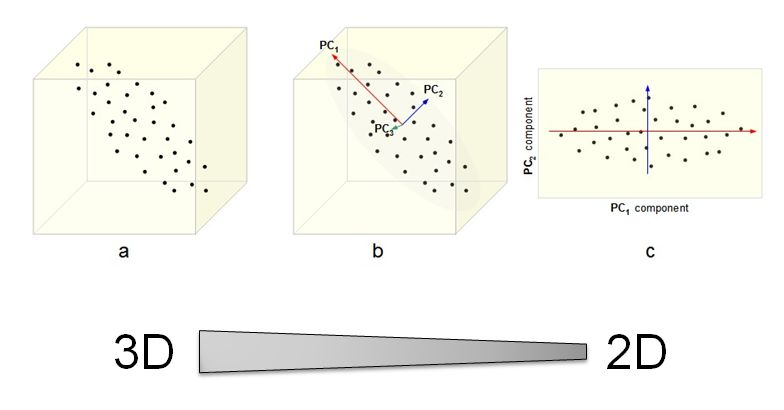

In [35]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(x)                           # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(x)  

In [36]:
df['PCA1'] = X_2D[:, 0]
df['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=df, fit_reg=False);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


### Unsupervised learning: clustering (GMM)
https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2021-02-08-GMM_and_EM/pic1.mp4

In [43]:
from sklearn.mixture import GaussianMixture as GMM   # 1. Choose the model class
model = GMM(n_components=3, covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(x)                                         # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(x)                             # 4. Determine cluster labels

In [44]:
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


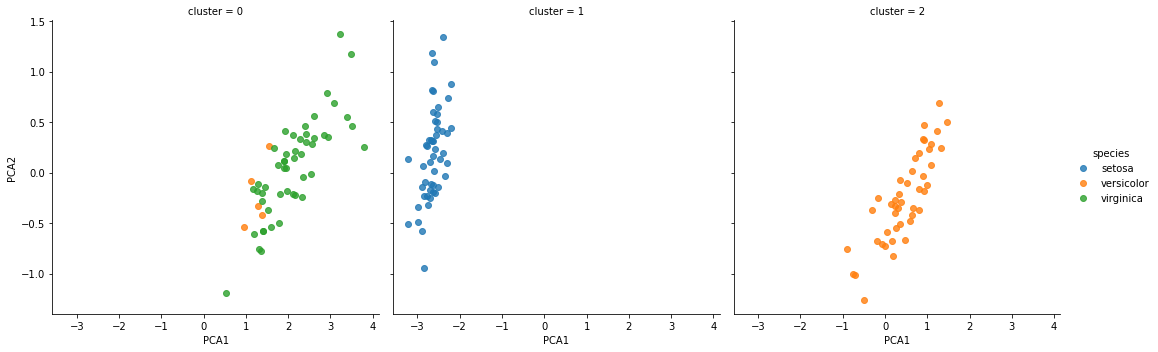

In [45]:
df['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=df, hue='species', col='cluster', fit_reg=False);

In [46]:
df

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

         PCA1      PCA2  cluster  
0   -2.684126  0.319397        1  
1   -2.714142 -0.177001        1  
2   -2.888991 -0.144949        1  
3   -2.745343 -0.318299        1  
4   -2.728717  0.326755        1  
..        ...       ...      ...  
145  1.944110  0.187532        0  
146  1.527167 -0.375317        0  
147  1.764346  0.078859        0  
148  1.900942  0.116628        0  
149  1.390189 -0.282661        0  

[150 rows x 8 columns]